### Setup

In [2]:
using Dragoon

In [3]:
#numbers of discs in the booster
n = 20

#initial disc configuration
#findpeak tries to find an equidistant configuration with a peak at f
initdist = fill(findpeak(22.025e9,n),n)

#generate frequencies for calculation and for plotting
freqs = genFreqs(22.025e9,50e6; length=10) #optimize on these frequencies
freqsplot = genFreqs(22.025e9,150e6; length=1000)

#initialize physical properties of the booster
booster = Booster(dist2pos(initdist),n,1e-3,24.,0.1e-3,2,0.,0.,0.)
#=
Booster(
    pos,              disc positions
    ndisk,            disc number
    thickness,        disc thickness
    epsilon,          disc epsilon
    vmotor,           motor speed
    maxlength,        maximum allowed booster length (not implemented yet)
    timestamp,        booster operation time
    summedtraveltime, summed motor operation time
    codetimestamp     code runtime
)
=#

#initialize storage of measurements
hist = initHist(booster,10000,freqs,(getObjAna1d,[]))
#                           ^ length, should be at least the larger of n^2, search steps
;

Objective Value: -243.3, Timestamp: 0.0


### Optimizer

In [ ]:
#=
how to use

linesearch(                     directly modifies booster.pos
    booster,                    
    hist,                       
    freqs,                      frequency range to optimize on
    α,                          base step length e.g. motorspeed*measurementfrequency
    (objective,[options]),      objective function
    (solver,[options]),         provides step direction p
    (derivative,[options]),     provides derivatives for use by solver
    (step,[options]),           calculates steplength
    (search,[options]),         search mode
    (unstuckinator,[options]);  tries to unstuck system from bad local minima
    ϵgrad=0,                    terminate if norm(gradient) falls below this value,
    maxiter=100,                maximum allowed iterations,
    showtrace=false,            wether to print progress,
    showevery=1,                only print every i iterations,
    unstuckisiter=true          wether an unstucking iteration counts towards maxiter
                                    warning! can run endlessly if false
)

returns trace, access with
trace[iteration].x      disc position
                .obj    objective value
                .g      gradient
                .h      hessian
                .t      timestamp
                .T      summed travel time
=#

In [4]:
trace = linesearch(booster,hist,freqs,booster.vmotor*1e-3,
                    (getObjAna1d,[]),
                    (solverNewton,["inv"]),
                    (secondDerivative,[1e-5,1e-6,"double"]),
                    (stepNorm,["unit"]),
                    (searchExtSteps,[2000]),
                    (unstuckDont,[]);
                    ϵgrad=0.,maxiter=Int(2e1),showtrace=true);

Gradient norm: 4.69e6
Iter: 1, timestamp: 23.664
Iter finished. Steps: 2000, Objective value: -594.229

Gradient norm: 1.06e7
Iter: 2, timestamp: 47.174
Iter finished. Steps: 2000, Objective value: -979.995

Gradient norm: 1.76e7
Iter: 3, timestamp: 70.459
Iter finished. Steps: 2000, Objective value: -1335.444

Gradient norm: 2.48e7
Iter: 4, timestamp: 93.644
Iter finished. Steps: 2000, Objective value: -1682.144

Gradient norm: 3.23e7
Iter: 5, timestamp: 116.772
Iter finished. Steps: 2000, Objective value: -2024.194

Gradient norm: 3.95e7
Iter: 6, timestamp: 139.897
Iter finished. Steps: 2000, Objective value: -2394.792

Gradient norm: 4.3e7
Iter: 7, timestamp: 162.653
Iter finished. Steps: 2000, Objective value: -3246.05

Gradient norm: 5.34e7
Iter: 8, timestamp: 185.676
Iter finished. Steps: 2000, Objective value: -4103.047

Gradient norm: 8.4e7
Iter: 9, timestamp: 208.525
Iter finished. Steps: 2000, Objective value: -5236.845

Gradient norm: 7.71e7
Iter: 10, timestamp: 231.73
Iter 

In [5]:
#obtain result, booster is now in optimized position
#pos2dist(booster.pos)     #in distance space
booster.pos               #in position space

20-element Vector{Float64}:
 0.007244295076395453
 0.015441402704592726
 0.023615786226782863
 0.031850340813378605
 0.04005916693033037
 0.0482676369495816
 0.05648421398499575
 0.06464302496578211
 0.07288743331792248
 0.08117478681065335
 0.08935487085501906
 0.0975253230739688
 0.10577015421001461
 0.11385775155236488
 0.12284126460155134
 0.13075836770940363
 0.13892096090349118
 0.1470809483892883
 0.1552048875869972
 0.16313459406041086

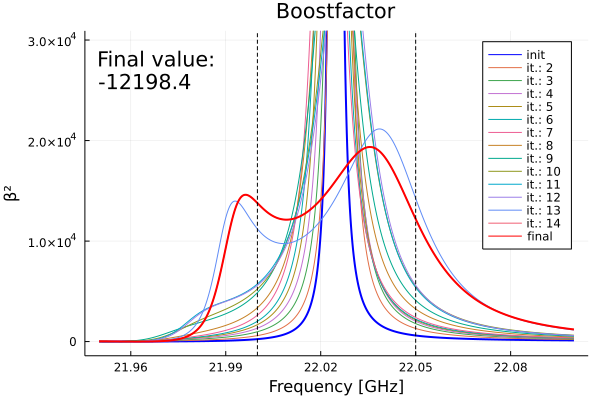

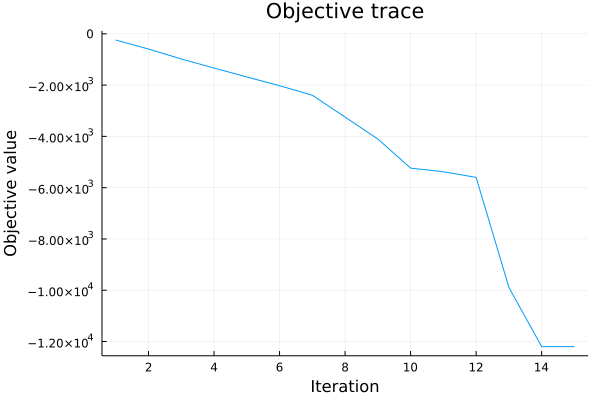

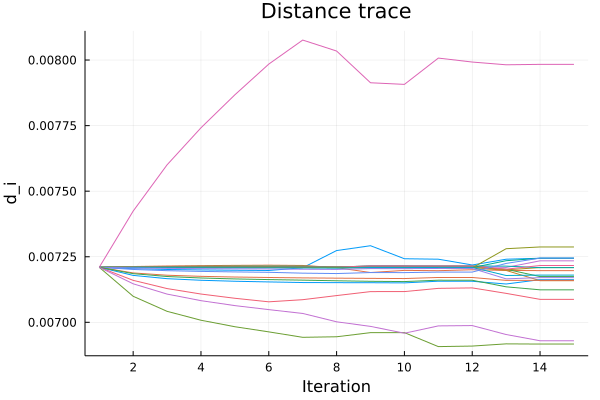

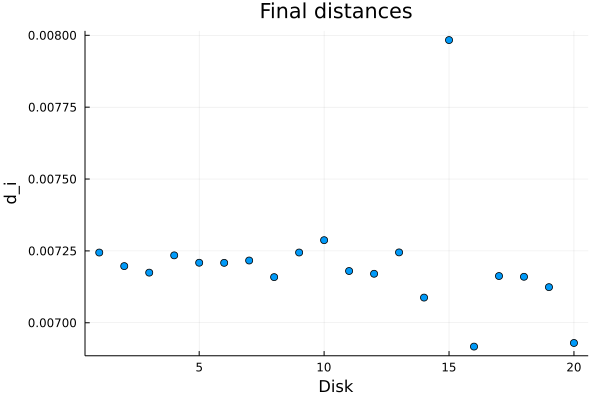

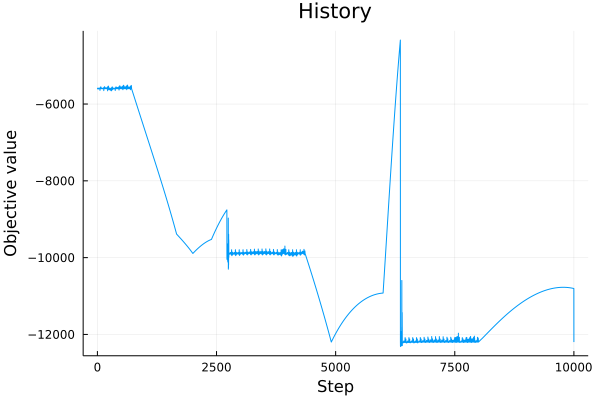

(Plot{Plots.GRBackend() n=16}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=20}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=1})

In [6]:
#get handy output
plt = analyse(hist,trace,freqsplot; freqs=freqs,div=10)

#savefig(plt[i],"cool_epic_result_wow.svg")